This ia a simple Webtoon Recommendation Application
Written By Victoria A. Pineda

In [1]:
#data processing
import numpy as np
import pandas as pd
import string
# enable the use of widgets
#imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

import ipywidgets as widgets

# import webtoon data
df = pd.read_csv("/Users/victoriapineda/Desktop/Capstone/WebtoonRecommendationApp/webtoon_data.csv")

# Conversions of data in certain columns

# convert View count (object) to int ex: 20M -> 20000000
df["view"] = df["view"].astype("string") 
#df['view'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df['view'] = df.view.str.translate(str.maketrans({'M':'000000'}))
df['view'] = df.view.str.translate(str.maketrans('','',string.punctuation))
df['view'] = pd.to_numeric(df['view'],errors='coerce')
df = df.replace(np.nan, 0, regex=True) # affect whole data, replaces Nan to 0
df['view'] = df['view'].astype(int)

# convert the release date to a simple year (int) format
# ex: Nov 6, 2019(object) -> 2019 (int)
df['released_date'] = df['released_date'].astype('string') 
# #remove everything before ","
df['released_date'] = df['released_date'].str.split(',').str[-1] 
#string -> numeric
df['released_date'] = df['released_date'].astype(float) #float before to int
df['released_date'] = df['released_date'].astype(int)

# convert subscribe count (object)-> int
df["subscribe"] = df["subscribe"].astype("string") 
df['subscribe'] = df.subscribe.str.translate(str.maketrans({'M':'000000'}))
df['subscribe'] = df.subscribe.str.translate(str.maketrans('','',string.punctuation))
df['subscribe'] = pd.to_numeric(df['subscribe'],errors='coerce')
df = df.replace(np.nan, 0, regex=True) 
df['subscribe'] = df['subscribe'].astype(int)

# convert likes (object)-> int
df["likes"] = df["likes"].astype("string") 
df['likes'] = df.likes.str.translate(str.maketrans({'M':'000000'}))
df['likes'] = df.likes.str.translate(str.maketrans('','',string.punctuation))
df['likes'] = pd.to_numeric(df['likes'],errors='coerce')
df = df.replace(np.nan, 0, regex=True) 
df['likes'] = df['likes'].astype(int)

# convert genre (object) -> String
df['genre'] = df['genre'].astype("string")
# convert title (object) -> string
df['title'] = df['title'].astype('string') 


# search field box 
webtoon_input = widgets.Text(
    description = "Enter Text:",
    disabled = False
)

            
# button groups
search_by_btns = widgets.RadioButtons(
    options = ['Author', 'Webtoon Title', 'Year'],
    description = "Search By:",
    disabled = False
)

sort_by_btns = widgets.RadioButtons(
    options = ['Rating', 'Views', 'Likes', 'Subscriber Total', 'Genre'],
    description = "Sort By:",
    disabled = False
)

# the Submit button to scan the database
submit_btn = widgets.Button(description= 'Start Search')

searchBy_btn_output = widgets.Output()
sortBy_btn_output = widgets.Output()


def submit_btn_clicked(b):
    with searchBy_btn_output:
        searchBy_btn_output.clear_output() # cleans output to prevent clutter
        
        if search_by_btns.value == 'Author':           
            with sortBy_btn_output:
                sortBy_btn_output.clear_output()
                
                if sort_by_btns.value == 'Rating':
                    df_view02 = df.iloc[:,[0,1,4,7]] # different 'view' only showing select cols
                    result = df_view02.query("Created_by == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['grade'], ascending=False) 
                    print(sorted_list)

                elif sort_by_btns.value == 'Views':
                    df_view02 = df.iloc[:,[0,1,4,5]]
                    result = df_view02.query("Created_by == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['view'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Likes':
                    df_view02 = df.iloc[:,[0,1,4,9]]
                    result = df_view02.query("Created_by == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['likes'], ascending=False) 
                    print(sorted_list)

                    
                elif sort_by_btns.value == 'Subscriber Total':
                    df_view02 = df.iloc[:,[0,1,4,6]]
                    result = df_view02.query("Created_by == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['subscribe'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Genre': # alphabetically
                    df_view02 = df.iloc[:,[0,1,2,4]]
                    result = df_view02.query("Created_by == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['genre'], ascending=False) 
                    print(sorted_list)
                    
                    
        elif search_by_btns.value == 'Webtoon Title':
            with sortBy_btn_output:
                sortBy_btn_output.clear_output()
                
                if sort_by_btns.value == 'Rating':
                    df_view02 = df.iloc[:,[0,1,7]] # different 'view' only showing select cols
                    result = df_view02.query("title == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['grade'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Views':
                    df_view02 = df.iloc[:,[0,1, 5]]
                    result = df_view02.query("title == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['view'], ascending=False) 
                    print(sorted_list)
                
                elif sort_by_btns.value == 'Likes':
                    df_view02 = df.iloc[:,[0,1, 9]]
                    result = df_view02.query("title == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['likes'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Subscriber Total':
                    df_view02 = df.iloc[:,[0,1, 6]]
                    result = df_view02.query("title == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['subscribe'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Genre':
                    df_view02 = df.iloc[:,[0,1, 2]]
                    result = df_view02.query("title == @webtoon_input.value")
                    sorted_list = result.sort_values(by=['genre'], ascending=False) 
                    print(sorted_list)

            
            
        elif search_by_btns.value == 'Year': 
              # notes: the user input in widget is a string, convert to an int 
              # to be used in search (released_date was converted to int)
              with sortBy_btn_output:
                sortBy_btn_output.clear_output()
                
                if sort_by_btns.value == 'Rating':
                    y = webtoon_input.value # str
                    y_int = int(y) # str -> int
                    df_view02 = df.iloc[:,[0,1,7,8]]
                    result = df_view02.query("released_date == @y_int") 
                    sorted_list = result.sort_values(by=['grade'], ascending=False) 
                    print(sorted_list)
                
                elif sort_by_btns.value == 'Views':
                    y = webtoon_input.value # str
                    y_int = int(y) # str -> int
                    df_view02 = df.iloc[:,[0,1,5,8]]
                    result = df_view02.query("released_date == @y_int") 
                    sorted_list = result.sort_values(by=['view'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Likes':
                    y = webtoon_input.value # str
                    y_int = int(y) # str -> int
                    df_view02 = df.iloc[:,[0,1,8,9]]
                    result = df_view02.query("released_date == @y_int") 
                    sorted_list = result.sort_values(by=['likes'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Subscriber Total':
                    y = webtoon_input.value # str
                    y_int = int(y) # str -> int
                    df_view02 = df.iloc[:,[0,1,6,8]]
                    result = df_view02.query("released_date == @y_int") 
                    sorted_list = result.sort_values(by=['subscribe'], ascending=False) 
                    print(sorted_list)
                    
                elif sort_by_btns.value == 'Genre': 
                    y = webtoon_input.value # str
                    y_int = int(y) # str -> int
                    df_view02 = df.iloc[:,[0,1,2,8]]
                    result = df_view02.query("released_date == @y_int") 
                    sorted_list = result.sort_values(by=['genre']) # alphabetically
                    print(sorted_list)
                    
            
submit_btn.on_click(submit_btn_clicked) # set up button event
sub_btn = widgets.VBox([submit_btn,searchBy_btn_output,sortBy_btn_output]) # display the btn alongisde its output

# Containers
vbox = widgets.VBox([webtoon_input,search_by_btns,sort_by_btns, sub_btn])
vbox

# test data:
# EX: author instantmiso has 3 webtoons under their name
# Input must be EXACTLY the same as listed in the CSV file
# Year range is from 2014-2022


Visualizations (3)

Pie Chart - Displays the proportion of genres currently on WEBTOON

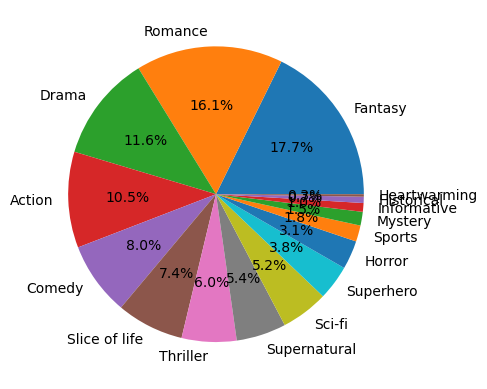

In [3]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/Users/victoriapineda/Desktop/Capstone/WebtoonRecommendationApp/webtoon_data.csv")

# count the number of repertitions for each genre
genre_freq = df['genre'].value_counts()
genre_freq

genre_freq.plot(kind='pie', ylabel="", autopct='%1.1f%%')
plt.show()


Bar Chart - Titles per genre

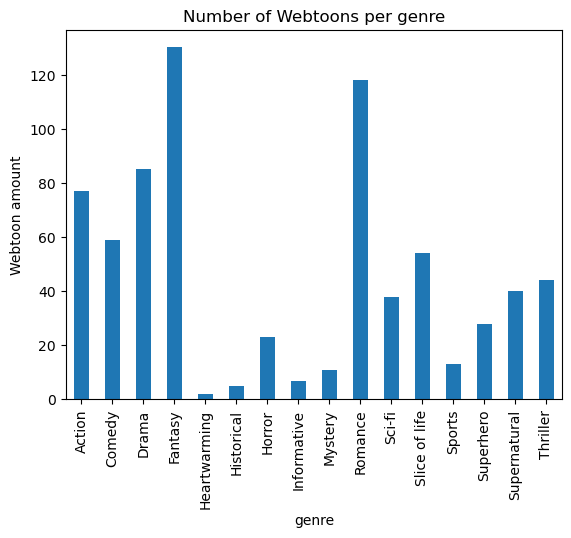

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/victoriapineda/Desktop/Capstone/WebtoonRecommendationApp/webtoon_data.csv")


title_group = df.groupby("genre")["title"].count()
view  =  title_group.plot(kind='bar', ylabel="Webtoon amount", title="Number of Webtoons per genre")


Scattergram - Year and webtoon release(by their id). Content was released in Enligh starting in 2014.

(2014.0, 2022.0)

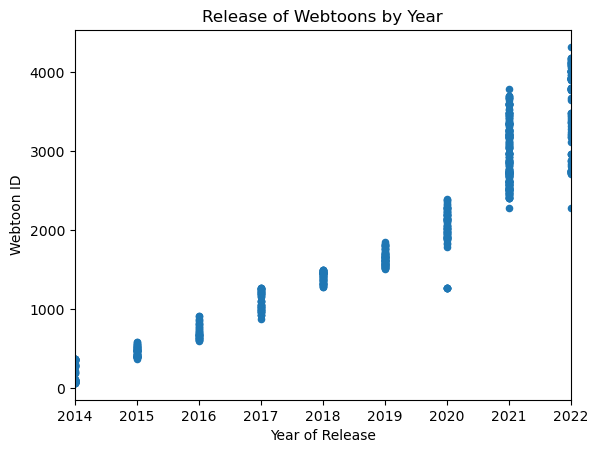

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("/Users/victoriapineda/Desktop/Capstone/WebtoonRecommendationApp/webtoon_data.csv")

# released_date -> string
df['released_date'] = df['released_date'].astype('string') 
#remove everything before ","
df['released_date'] = df['released_date'].str.split(',').str[-1] 
# string -> numeric
df['released_date'] = pd.to_numeric(df['released_date'])

# create graph
df.plot.scatter(y='webtoon_id', x ='released_date', ylabel="Webtoon ID", 
                xlabel="Year of Release", title="Release of Webtoons by Year")
plt.xlim(2014,2022)

#df.head()
#df.dtypes

Decision Tree (Image made in diagrams.net)

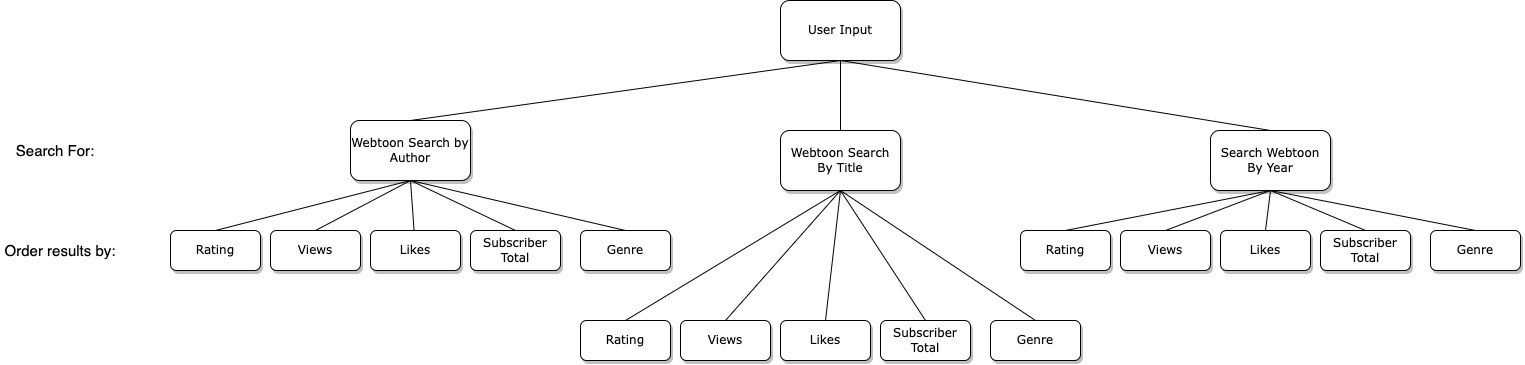